In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from IPython.display import display, Math
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
warnings.filterwarnings("ignore")
df = pd.read_csv('S1.csv', encoding='utf-8')
pd.set_option('display.max_columns', None)
df.head(2)

,absorber_thickness,defect_density,series_resistance,shunt_resistance,PCE (%)
0,0.3,1.000000e+13,1.0,100.0,10.2
1,0.3,1.000000e+13,1.0,1000.0,23.3


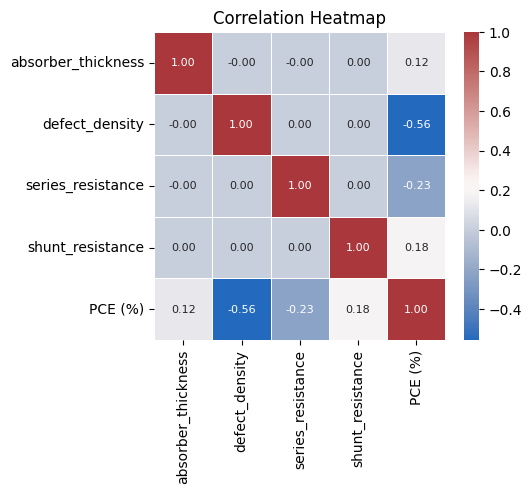

In [ ]:
df1=df.iloc[:,0:]
corr_matrix = df1.corr()
plt.figure(figsize=(4.7, 4))  # Optional: Adjust the figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='vlag', fmt=".2f", linewidths=0.5,  annot_kws={"size": 8})
plt.title('Correlation Heatmap')
#plt.savefig('Correlation.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
dfx=df.iloc[:,:-1]
X=dfx.values
y=df.iloc[:,-1].values
y=y.reshape(len(y),1)
dfx

,absorber_thickness,defect_density,series_resistance,shunt_resistance
0,0.3,1.000000e+13,1.0,100.0
1,0.3,1.000000e+13,1.0,1000.0
2,0.3,1.000000e+13,1.0,10000.0
3,0.3,1.000000e+13,1.0,100000.0
4,0.3,1.000000e+13,1.0,1000000.0
...,...,...,...,...
3595,1.4,1.000000e+17,10.0,1000.0
3596,1.4,1.000000e+17,10.0,10000.0
3597,1.4,1.000000e+17,10.0,100000.0
3598,1.4,1.000000e+17,10.0,1000000.0


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2,  random_state=500)
gbr=GradientBoostingRegressor()
gbr.fit(X_train2, y_train2)

# Calculate cross-validated RMSE
mse_scores2 = cross_val_score(estimator=gbr, X=X_train2, y=y_train2, cv=5, scoring='neg_mean_squared_error')
rmse_scores2 = np.sqrt(-mse_scores2)
print("RMSE: {:.4f}".format(rmse_scores2.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores2.std()))

RMSE: 0.1468
Standard Deviation: 0.0127


In [ ]:
#GBR on test set
y_pred2=gbr.predict(X_test2)
y_pred2=y_pred2.reshape(len(y_pred2),1)
r_value2 = np.corrcoef(y_test2.squeeze(), y_pred2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test2, y_pred2))
print("R value:", r_value2)
print("MAE on Test Set:", mean_absolute_error(y_test2, y_pred2))
print("MSE on Test Set:", mean_squared_error(y_test2, y_pred2))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test2, y_pred2)))

R2 on Test Set: 0.9991554034824977
R value: 0.9995875053363134
MAE on Test Set: 0.10850198580313725
MSE on Test Set: 0.02171355162775766
RMSE on Test Set: 0.1473551886692751


In [ ]:
#GBR on train set
y_train_pred2 = gbr.predict(X_train2)
y_train_pred2=y_train_pred2.reshape(len(y_train_pred2),1)
r_value_p2 = np.corrcoef(y_train2.squeeze(), y_train_pred2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train2, y_train_pred2))
print("R value:", r_value_p2)
print("MAE on Train Set:", mean_absolute_error(y_train2, y_train_pred2))
print("MSE on Train Set:", mean_squared_error(y_train2, y_train_pred2))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train2, y_train_pred2)))

R2 on Train Set: 0.9994060642513269
R value: 0.9997073450205315
MAE on Train Set: 0.09959925151944979
MSE on Train Set: 0.016380715933264147
RMSE on Train Set: 0.1279871709714069


In [ ]:
np.set_printoptions(precision=2,suppress=True)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test2.reshape(len(y_test2),1)),1))

[[25.17 25.2 ]
 [17.58 17.6 ]
 [13.55 13.7 ]
 ...
 [23.24 23.3 ]
 [17.58 17.5 ]
 [22.68 22.4 ]]


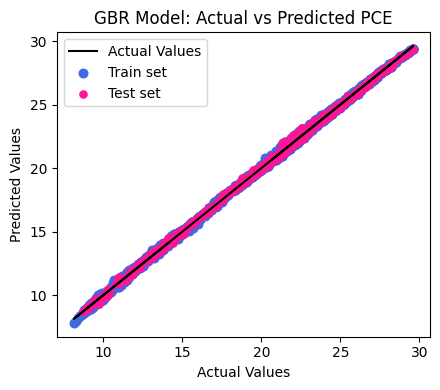

In [ ]:
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))
plt.plot(y_train2, y_train2, color='black', label='Actual Values')
plt.scatter(y_train2, y_train_pred2, edgecolors='royalblue',
                linewidth=1.2,color='royalblue', label='Train set')
plt.scatter(y_test2, y_pred2, edgecolors='deeppink',
                linewidth=1.2,color='deeppink', label='Test set', s=25)
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
#plt.grid(True)
plt.title('GBR Model: Actual vs Predicted PCE')
plt.savefig('GBR Model: Actual vs Predicted PCE.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

In [ ]:
pip install shap


In [ ]:
import shap
shap.initjs()

In [ ]:
dfx.shape

(3600, 4)

In [ ]:
col=dfx.columns
dfx_test = pd.DataFrame(data=X_train2, columns=col)

In [ ]:
explainer=shap.Explainer(gbr)
shap_values=explainer(dfx_test[0:4000])

In [ ]:
np.shape(shap_values.values)

(2880, 4)

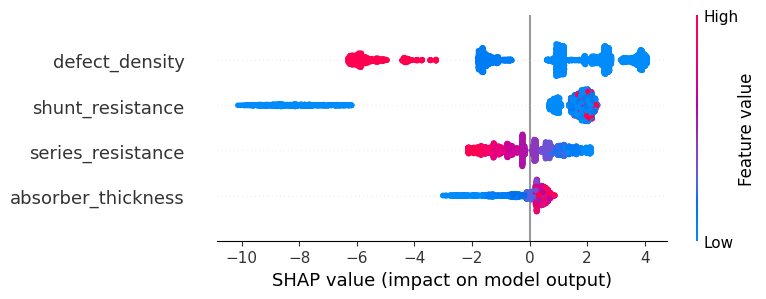

In [ ]:
plt.figure(figsize=(10, 3))
shap.summary_plot(shap_values)
plt.show()

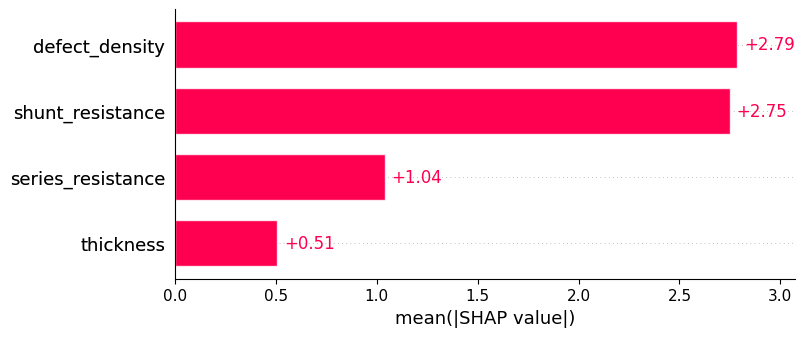

In [ ]:
plt.figure(figsize=(5, 3))
shap.plots.bar(shap_values)
plt.show()